### Importing Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

### Reading PCA Data

In [56]:
df_pca = pd.read_csv("../data/heart_disease_pca.csv")

X_pca = df_pca.drop('target', axis=1)
y_pca = df_pca['target']

In [57]:
y_pca = (y_pca > 0).astype(int)

print(X_pca)
print(y_pca)

            0         1         2  ...         9        10        11
0    1.162722 -0.929622  3.212341  ... -0.453161  0.222642  0.497023
1    3.217830 -1.451021 -0.481532  ...  1.475782 -1.032829 -0.942472
2    3.143604  0.636569 -0.364301  ...  0.470704  0.340281  0.895176
3   -0.464908  1.409706  0.395323  ...  0.243848 -1.545183  0.170085
4   -2.268663 -0.388683 -0.068956  ...  0.553453  0.912098 -0.281023
..        ...       ...       ...  ...       ...       ...       ...
298 -0.681785  1.468233  0.635553  ... -0.129400  0.944440 -1.008997
299  2.622988 -0.054973  2.149831  ... -0.770099 -0.680014  0.632575
300  1.875704  2.381775 -0.163163  ...  0.149083  0.530891  0.057319
301 -1.313325 -1.514695 -0.140115  ...  0.249003  1.051899  0.484029
302 -2.601110  1.412842  0.587092  ...  0.187876 -0.591614 -0.596642

[303 rows x 12 columns]
0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64


### Splitting Data into Train and Test Sets

In [58]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

print("Train Size: ", len(X_train_pca))
print("Test Size: ", len(X_test_pca))


Train Size:  242
Test Size:  61


### Training and Evaluating Models

In [59]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_pca, y_train_pca)

y_pred_pca = model_lr.predict(X_test_pca)

print("Classification Report (PCA):\n", classification_report(y_test_pca, y_pred_pca))

Classification Report (PCA):
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [60]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_pca, y_train_pca)
y_pred_dt = model_dt.predict(X_test_pca)

print("Classification Report (Decision Tree):\n", classification_report(y_test_pca, y_pred_dt))

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [61]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_pca, y_train_pca)
y_pred_rf = model_rf.predict(X_test_pca)

print("Classification Report (Random Forest):\n", classification_report(y_test_pca, y_pred_rf))

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [62]:
model_svm = SVC(probability=True, random_state=42)
model_svm.fit(X_train_pca, y_train_pca)
y_pred_svm = model_svm.predict(X_test_pca)

print("Classification Report (SVM):\n", classification_report(y_test_pca, y_pred_svm))

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [52]:
print(X_pca.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='object')


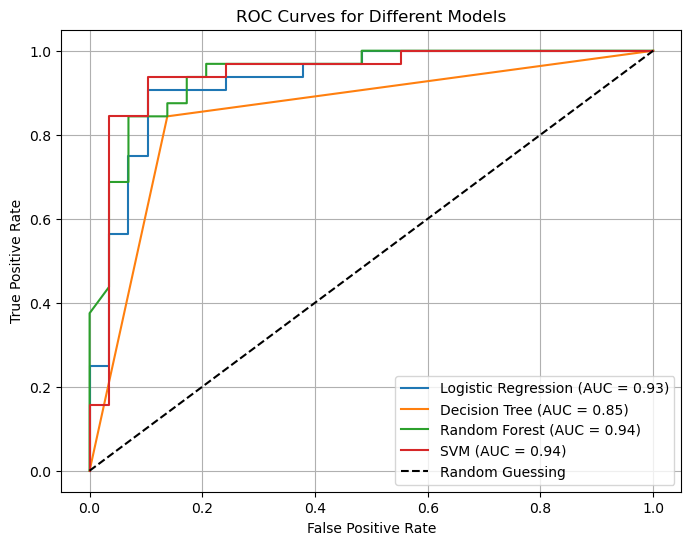

In [63]:
plt.figure(figsize=(8, 6))

models = {
    'Logistic Regression': model_lr,
    'Decision Tree': model_dt,
    'Random Forest': model_rf,
    'SVM': model_svm
}

for name, model in models.items():
    y_proba = model.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_pca, y_proba)
    roc_auc = roc_auc_score(y_test_pca, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [64]:
# Saving the models
import joblib

joblib.dump(model_lr, '../models/model_lr_pca.pkl')
joblib.dump(model_dt, '../models/model_dt_pca.pkl')
joblib.dump(model_rf, '../models/model_rf_pca.pkl')
joblib.dump(model_svm, '../models/model_svm_pca.pkl')

print("Models saved successfully.")

Models saved successfully.


In [65]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

models = {
    'Logistic Regression': model_lr,
    'Decision Tree': model_dt,
    'Random Forest': model_rf,
    'SVM': model_svm
}

with open("../models/supervised_models_evaluation_metrics.txt", "w") as f:
    for name, model in models.items():
        y_pred = model.predict(X_test_pca)
        y_proba = model.predict_proba(X_test_pca)[:, 1]
        auc = roc_auc_score(y_test_pca, y_proba)
        
        f.write(f"{name}\n")
        f.write(f"Accuracy: {accuracy_score(y_test_pca, y_pred):.4f}\n")
        f.write(f"AUC: {auc:.4f}\n")
        f.write(classification_report(y_test_pca, y_pred))
        f.write("\n" + "-"*50 + "\n")

print("Metrics saved to ../models/supervised_models_evaluation_metrics.txt")


Metrics saved to ../models/supervised_models_evaluation_metrics.txt
